In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install face_recognition


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for face_recognition from https://files.pythonhosted.org/packages/1e/95/f6c9330f54ab07bfa032bf3715c12455a381083125d8880c43cbe76bb3d0/face_recognition-1.3.0-py2.py3-none-any.whl.metadata
  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
  Using cached dlib-19.24.4.tar.gz (3.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
Failed to build dlib
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [6 lines of output]
  running bdist_wheel
  running build
  running build_ext
  
  ERROR: CMake must be installed to build dlib
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for dlib
ERROR: Could not build wheels for dlib, which is required to install pyproject.toml-based projects


In [1]:
import cv2

imagePath = '1.png'
imagepath = 'f1.jpg'

In [2]:
img1 = cv2.imread(imagePath)
img2 = cv2.imread(imagepath)

In [3]:
print(img1.shape)
print(img2.shape)

(442, 382, 3)
(1280, 963, 3)


In [4]:
gray_image1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


In [5]:
print(gray_image1.shape)
print(gray_image2.shape)


(442, 382)
(1280, 963)


In [6]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [7]:
face1 = face_classifier.detectMultiScale(
    gray_image1, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)
face2 = face_classifier.detectMultiScale(
    gray_image2, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [8]:
for (x, y, w, h) in face1:
    cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 255, 0), 4)
for (x, y, w, h) in face2:
    cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [9]:
img_rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

(-0.5, 381.5, 441.5, -0.5)

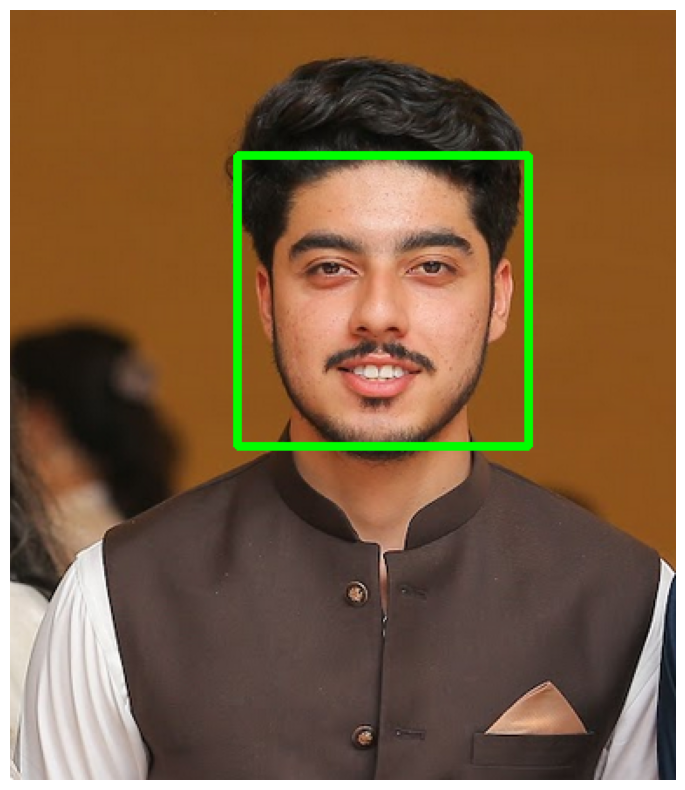

In [10]:
import matplotlib.pyplot as plt



plt.figure(figsize=(20,10))
plt.imshow(img_rgb1)
plt.axis('off')

(-0.5, 962.5, 1279.5, -0.5)

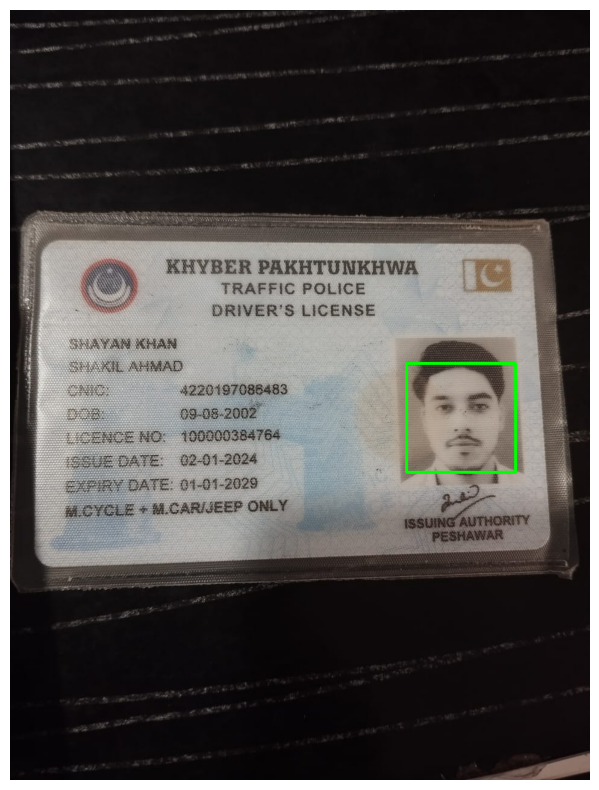

In [11]:
plt.figure(figsize=(20,10))
plt.imshow(img_rgb2)
plt.axis('off')


In [13]:
import cv2
import face_recognition

# Load the images
imagePath1 = '1.png'
imagePath2 = 'f1.jpg'
img1 = cv2.imread(imagePath1)
img2 = cv2.imread(imagePath2)

# Convert the images to RGB (face_recognition uses RGB format)
img_rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Find face locations in both images
face_locations1 = face_recognition.face_locations(img_rgb1)
face_locations2 = face_recognition.face_locations(img_rgb2)

# Encode the faces found in the images
face_encodings1 = face_recognition.face_encodings(img_rgb1, face_locations1)
face_encodings2 = face_recognition.face_encodings(img_rgb2, face_locations2)

# Check if any faces were found in both images
if len(face_encodings1) == 0 or len(face_encodings2) == 0:
    print("No faces found in one or both images.")
else:
    for i, face_encoding1 in enumerate(face_encodings1):
        match_found = False
        for j, face_encoding2 in enumerate(face_encodings2):
            match = face_recognition.compare_faces([face_encoding1], face_encoding2)
            if match[0]:
                match_found = True
                (top, right, bottom, left) = face_locations1[i]
                cv2.rectangle(img1, (left, top), (right, bottom), (0, 255, 0), 4)
                (top, right, bottom, left) = face_locations2[j]
                cv2.rectangle(img2, (left, top), (right, bottom), (0, 255, 0), 4)
                break
        if not match_found:
            (top, right, bottom, left) = face_locations1[i]
            cv2.rectangle(img1, (left, top), (right, bottom), (0, 0, 255), 4)
    
    for j in range(len(face_encodings2)):
        if not any(face_recognition.compare_faces(face_encodings1, face_encodings2[j])):
            (top, right, bottom, left) = face_locations2[j]
            cv2.rectangle(img2, (left, top), (right, bottom), (0, 0, 255), 4)

# Convert back to BGR for displaying with OpenCV
img1_bgr = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
img2_bgr = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)

"""
# Display the images with rectangles around the faces
cv2.imshow("Image 1", img1)
cv2.imshow("Image 2", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()
"""


'\n# Display the images with rectangles around the faces\ncv2.imshow("Image 1", img1)\ncv2.imshow("Image 2", img2)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n'

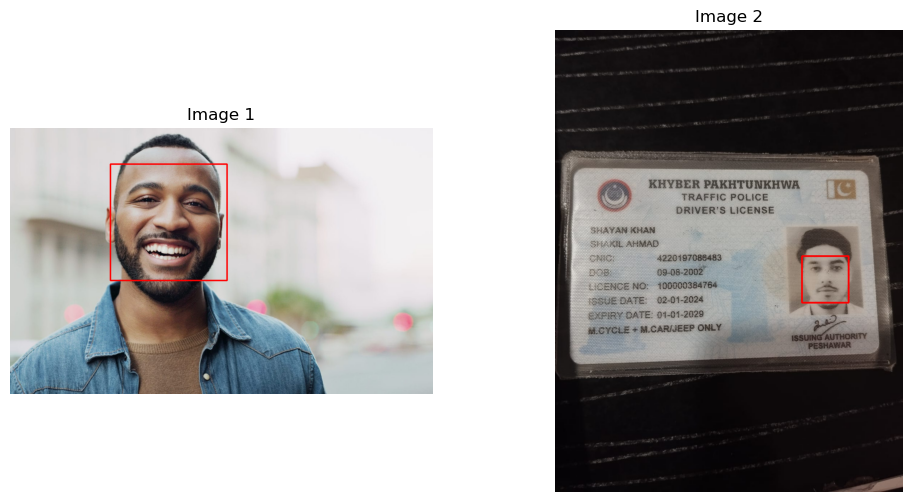

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))

# Display first image
plt.subplot(1, 2, 1)
plt.imshow(img1_bgr)
plt.title('Image 1')
plt.axis('off')  # Hide the axis

# Display second image
plt.subplot(1, 2, 2)
plt.imshow(img2_bgr)
plt.title('Image 2')
plt.axis('off')  # Hide the axis

# Show the plot
plt.show()

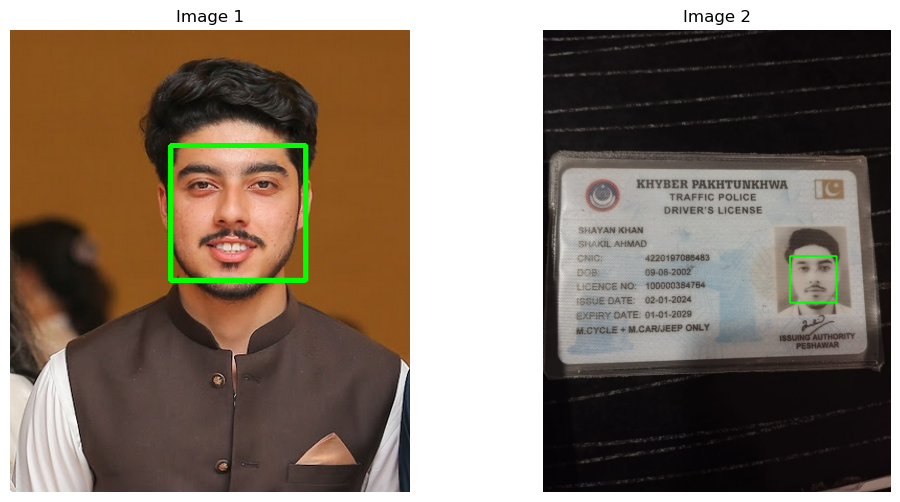

In [15]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))

# Display first image
plt.subplot(1, 2, 1)
plt.imshow(img1_bgr)
plt.title('Image 1')
plt.axis('off')  # Hide the axis

# Display second image
plt.subplot(1, 2, 2)
plt.imshow(img2_bgr)
plt.title('Image 2')
plt.axis('off')  # Hide the axis

# Show the plot
plt.show()